rectangle no.  5 relatively changed by  0.0804 
rectangle no.  7 relatively changed by  0.0727 
rectangle no. 18 relatively changed by  0.0662 


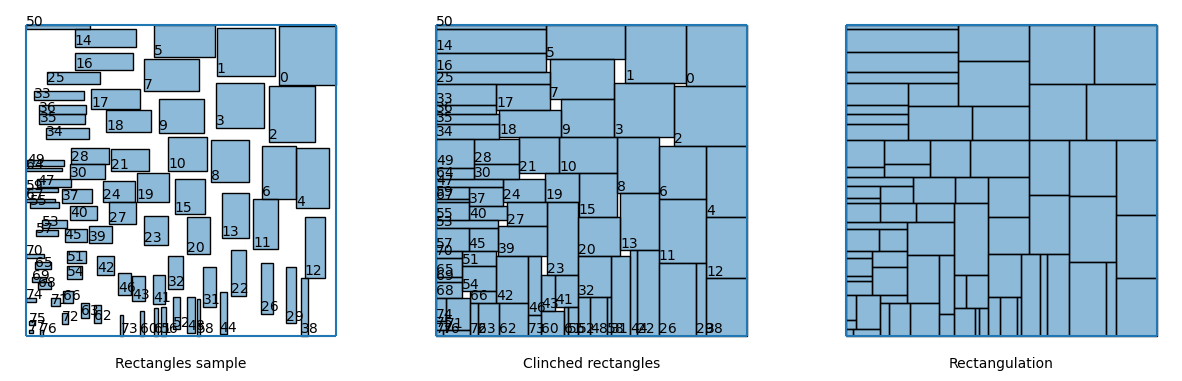

In [16]:
import numpy as np
from SquareDivision.src.rectangle_class import Rectangulation
from SquareDivision.src.distributions import FromFunction, BetweenFunctions, tepui, surface_perp_to

rects = Rectangulation(config={"seed": 123567})


width_0 = lambda mid_pt: surface_perp_to(mid_pt, vect = np.array([0, -1, 5]), val_at_0 = 0.005)
width_1 = lambda mid_pt: surface_perp_to(mid_pt, vect = np.array([0, -2, 10]), val_at_0 = 0.01)
# width_1 = lambda mid_pt: tepui(mid_pt, top=0.6, bottom=0.01, slope=2, vertex=0.8, pts=np.array([[0.5, 0.5]]))

height_0 = lambda mid_pt: surface_perp_to(mid_pt, vect = np.array([-1, 0, 5]), val_at_0 = 0.005)
height_1 = lambda mid_pt: surface_perp_to(mid_pt, vect = np.array([-2, 0, 10]), val_at_0 = 0.01)
# height_1 = lambda mid_pt: tepui(mid_pt, top=0.6, bottom=0.01, slope=2, vertex=0.6, pts=np.array([[0.5, 0.5]]))

rects.sample_rectangles(
    num=412, 
    widths_strategy = BetweenFunctions(func_0=width_0, func_1=width_1, rng=rects.rng), 
    heights_strategy= BetweenFunctions(func_0=height_0, func_1=height_1, rng=rects.rng), 
)
rects.find_disjoint_family()
rects.clinch()
rects.close_holes()

rects.report(tol=0.01, digits=4, limit_list=3)
rects.draw(disjoint=True, inflated=True, inflated_nums=True, closed=True, closed_nums=False)

In [2]:
rects.arr

array([[5.78283373e-01, 5.85345837e-01, 1.40133826e-01, 1.38856471e-01],
       [8.60061152e-01, 8.91157579e-01, 1.39938848e-01, 1.08842421e-01],
       [3.78441856e-01, 5.79740403e-01, 1.35399225e-01, 9.85443482e-02],
       [5.69024789e-01, 3.95796126e-01, 9.85977233e-02, 1.29444437e-01],
       [8.98957047e-01, 1.86885913e-01, 6.33884247e-02, 1.93992505e-01],
       [0.00000000e+00, 9.79357938e-01, 2.04677416e-01, 2.06420624e-02],
       [5.21703116e-01, 1.05262189e-02, 2.18644700e-02, 1.13024337e-01],
       [3.17806343e-02, 3.19675028e-01, 7.41742984e-02, 2.23399052e-02],
       [1.08726291e-02, 7.81338560e-03, 1.28413388e-02, 1.32416298e-02],
       [4.77148731e-02, 2.09652274e-04, 8.35412295e-03, 1.65930209e-02]])

### graph f : (0, 1)^2 -> R

In [ ]:
import numpy as np
from SquareDivision.src.distributions import surface_perp_to, tepui
from SquareDivision.draw.draw import draw_func
surface_perp_to_kwargs = {'vect' : np.array([0, -1, 5]), 'val_at_0' : 0.005}
tepui_kwargs = {
    'top' : 0.4, 
    'bottom' : 0.1, 
    'slope' : 3, 
    'vertex' : 0.7, 
    'pts' : np.array([[0.5, 0.5]])
    }
draw_func(surface_perp_to, func_kwargs = surface_perp_to_kwargs )
draw_func(tepui, func_kwargs = tepui_kwargs )

In [ ]:
rects.draw_contact_graph(1)

In [ ]:
import numpy as np
from numpy.random._generator import Generator

def call_experiment(distribution, rng:Generator, **kwargs):
    return rng.__getattribute__(distribution)(**kwargs)
xmin, ymin, xmax, ymax = 0, 0, 1, 1
# [xmin, ymin], [xmax, ymax], size=(2, 2)
call_experiment('uniform', rects.rng, low=[0, 0], high=[1, 1], size=(2, 2))

In [20]:
import numpy as np
from SquareDivision.walls.suspended_walls import SuspendedWalls
sus_data = np.array([[0.5,0.5,0.65],[0.1,0.1,0.3],[0.5001,0.4,0.7],[0.3,0.2,0.1]])
suspended_walls = SuspendedWalls(data=sus_data, direction='vertical')
# print(suspended_walls.data)
print(suspended_walls.walls_in_half_plane(suspended_wall=np.array([2,0,2]), leq_or_geq='geq'))
print(suspended_walls.potential_bariers(np.array([2,0,2]), leq_or_geq='geq'))
# suspended_walls.first_barrier_in_wall_push(suspended_wall=np.array([0.01,0.35,0.51]), leq_or_geq='geq')
suspended_walls.first_barrier_in_wall_scale([0.01, 0.15,0.15007],'leq',0.005)

In [20]:
print(right_walls.data[0])
print(left__walls.first_barrier_in_wall_push(right_walls.data[0],'geq'))

[0.7184172  0.58534584 0.72420231]
[1.         0.58534584 0.72420231]


In [11]:
from SquareDivision.walls.suspended_walls import from_rectangles_family
from SquareDivision.morph.inflate_strategy import rectangles_idx_update, find_max_scaling, scale_rectangle, rectangle_walls

disjoint_rectangles = rects.arr
left__walls = from_rectangles_family(disjoint_rectangles, dir='l')
right_walls = from_rectangles_family(disjoint_rectangles, dir='r')
down__walls = from_rectangles_family(disjoint_rectangles, dir='d')
upper_walls = from_rectangles_family(disjoint_rectangles, dir='u')


ImportError: cannot import name 'find_max_scaling' from 'SquareDivision.morph.inflate_strategy' (d:\Users\jg255\Collective-dynamics-LAB\Polatucha16\SquareDivision\SquareDivision\morph\inflate_strategy.py)

In [18]:
find_max_scaling(    
    2,
    disjoint_rectangles,
    left__walls,
    right_walls,
    down__walls,
    upper_walls)

1.055895483170707

In [19]:
rects.arr[2] = scale_rectangle(disjoint_rectangles[2], 1.055895483170707)

In [31]:
from SquareDivision.morph.inflate_strategy import MaxHomThenMaxPushFromOrder, scale_rectangle
strategy = MaxHomThenMaxPushFromOrder(rects.arr)
strategy.update_walls()
strategy.find_max_scaling(8)
rects.arr[8] = scale_rectangle(rects.arr[8], 1.0549383376859618)

In [29]:
strategy.update_walls()

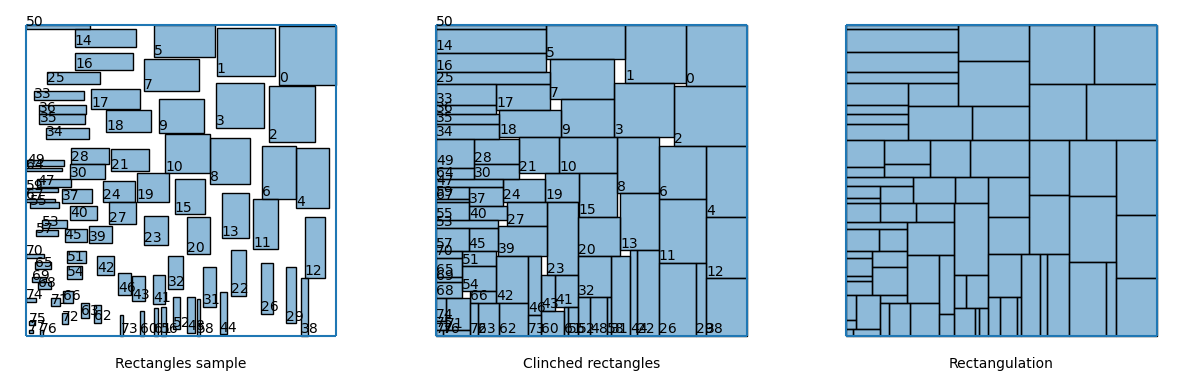

In [32]:
# rects.arr = strategy.inflate()
rects.draw(disjoint=True, inflated=True, inflated_nums=True, closed=True, closed_nums=False)

In [33]:
print(strategy.right_walls[10])
print(strategy.left__walls[8])

print(strategy.down__walls[10])
print(strategy.upper_walls[19])

[0.59418404 0.5226999  0.6490047 ]
[0.59749117 0.4939744  0.63159795]
[0.5226999  0.44853505 0.59418404]
[0.5226999  0.35751012 0.4603331 ]
